<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/DT/sampling/01_workshop_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imblearn

In [2]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap



In [3]:
warnings.filterwarnings("ignore")

# **Descripción**
---
El conjunto de datos describe las propiedades químicas del vidrio e implica la clasificación de muestras de vidrio utilizando sus propiedades químicas como una de seis clases. El conjunto de datos fue acreditado a Vina Spiehler en 1987.


# **Diccionario**
---
- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Class:
  - building windows (float processed)
  - building windows (non-float processed)
  - vehicle windows (float processed)
  - vehicle windows (non-float processed)
  - containers
  - tableware
  - headlamps

# **Data**
---

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data = pd.read_csv(url, names=names)

In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
def sample_fit()->tuple:
  X = data.iloc[:, :-1]
  y = data.iloc[:, -1]
  return X, y

In [7]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)

def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

# **Sin Sobremuestreo**
---

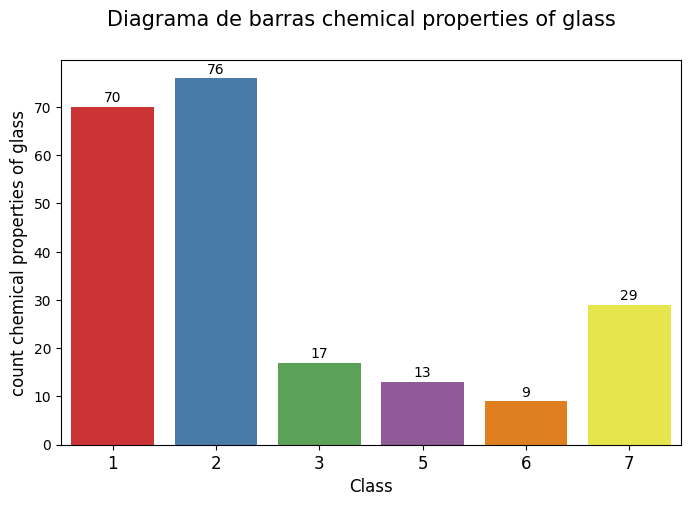

In [8]:
_, y = sample_fit()

plot_bar(
    data,
    ejeX='Class',
    ejey='count chemical properties of glass',
    title='chemical properties of glass')

# **Sobremuestreo**
---

In [9]:
X, y = sample_fit()

In [10]:
#Estimador de sobremuestreo
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

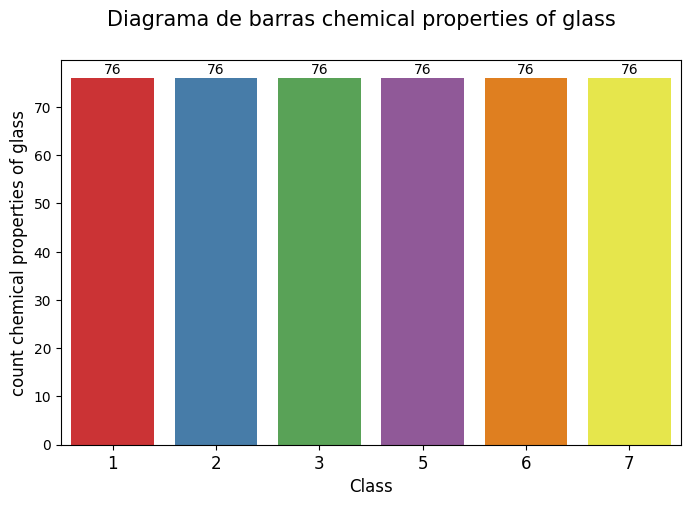

In [11]:
plot_bar(
    pd.concat([X, y], axis=1),
    ejeX='Class',
    ejey='count chemical properties of glass',
    title='chemical properties of glass')

# **Sobremuestreo Condicional**
---
- sobremuestrear a 50, 25, 45 y 48 ejemplos las clases 3,5,6 y 7 respectivamente.

In [12]:
X, y = sample_fit()
strategy = {3:50, 5:25, 6:45, 7:48}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

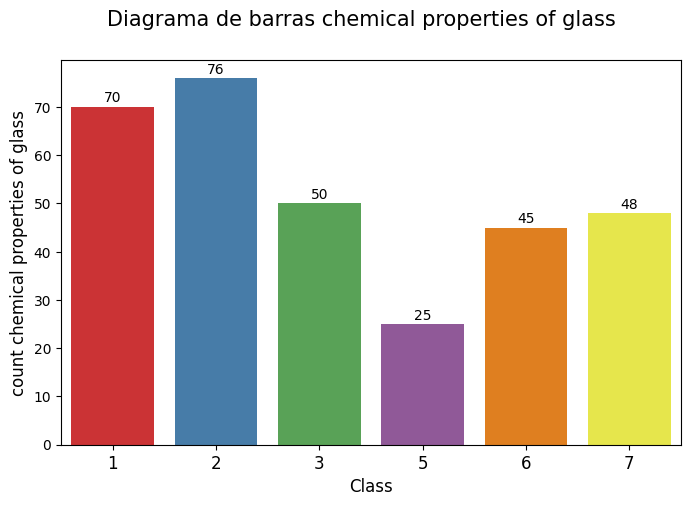

In [13]:
plot_bar(
    pd.concat([X, y], axis=1),
    ejeX='Class',
    ejey='count chemical properties of glass',
    title='chemical properties of glass')

# **Combina la muestra real y la sintetica**
---

In [15]:
X, y = sample_fit()
strategy = {3:50, 5:25, 6:45, 7:48}
oversample = SMOTE(sampling_strategy=strategy)
X2, y2 = oversample.fit_resample(X, y)

In [30]:
list(strategy.keys())

[3, 5, 6, 7]

In [32]:
sobremuestreo = pd.concat([X2, y2], axis=1)
sobremuestreo = sobremuestreo.query(f'Class in {list(strategy.keys())}')

In [33]:
original = pd.concat([X, y], axis=1)

In [35]:
conca_data = pd.concat([original, sobremuestreo], axis=0)

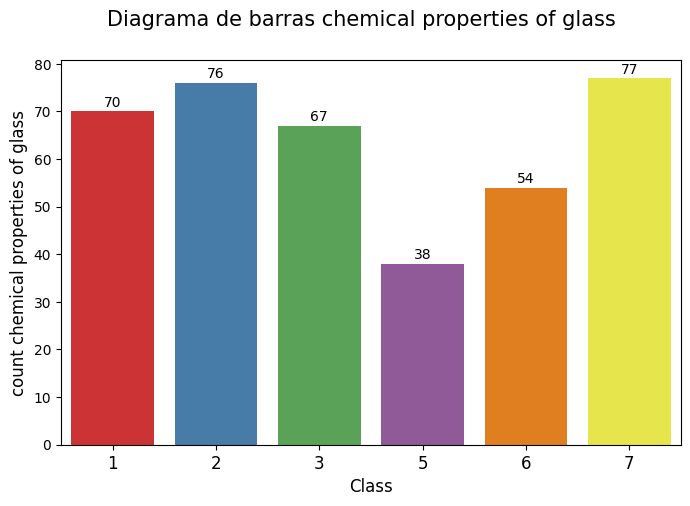

In [37]:
plot_bar(
    conca_data,
    ejeX='Class',
    ejey='count chemical properties of glass',
    title='chemical properties of glass')

**Cuando se utiliza el muestreo de datos como SMOTE, solo debe aplicarse al conjunto de datos de entrenamiento, no al conjunto de datos completo.**

# **Referencias**
---
https://machinelearningmastery.com/multi-class-imbalanced-classification/